# Using Text Data with EvalML

In this demo, we will show you how to use EvalML to build models which use text data. 

In [1]:
import evalml
from evalml import AutoMLSearch

## Dataset

We will be utilizing a dataset of SMS text messages, some of which are categorized as spam, and others which are not ("ham"). This dataset is originally from [Kaggle](https://www.kaggle.com/uciml/sms-spam-collection-dataset), but modified to produce a slightly more even distribution of spam to ham.

In [2]:
from urllib.request import urlopen
import pandas as pd

input_data = urlopen('https://featurelabs-static.s3.amazonaws.com/spam_text_messages_modified.csv')
data = pd.read_csv(input_data)[:750]

X = data.drop(['Category'], axis=1)
y = data['Category']

display(X.head())

,Message
0,Free entry in 2 a wkly comp to win FA Cup fina...
1,FreeMsg Hey there darling it's been 3 week's n...
2,WINNER!! As a valued network customer you have...
3,Had your mobile 11 months or more? U R entitle...
4,"SIX chances to win CASH! From 100 to 20,000 po..."


The ham vs spam distribution of the data is 3:1, so any machine learning model must get above 75% [accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision#In_binary_classification) in order to perform better than a trivial baseline model which simply classifies everything as ham. 

In [3]:
y.value_counts(normalize=True)

spam    0.593333
ham     0.406667
Name: Category, dtype: float64

In order to properly utilize Woodwork's 'Natural Language' typing, we need to pass this argument in during initialization. Otherwise, this will be treated as an 'Unknown' type and dropped in the search.

In [4]:
X.ww.init(logical_types={"Message": "NaturalLanguage"})

## Search for best pipeline

In order to validate the results of the pipeline creation and optimization process, we will save some of our data as a holdout set.

In [5]:
X_train, X_holdout, y_train, y_holdout = evalml.preprocessing.split_data(X, y, problem_type='binary', test_size=0.2, random_seed=0)

EvalML uses [Woodwork](https://woodwork.alteryx.com/en/stable/) to automatically detect which columns are text columns, so you can run search normally, as you would if there was no text data. We can print out the logical type of the `Message` column and assert that it is indeed inferred as a natural language column.

In [6]:
X_train.ww

,Physical Type,Logical Type,Semantic Tag(s)
Column,,,
Message,string,NaturalLanguage,[]


Because the spam/ham labels are binary, we will use `AutoMLSearch(X_train=X_train, y_train=y_train, problem_type='binary')`. When we call `.search()`, the search for the best pipeline will begin. 

In [7]:
automl = AutoMLSearch(X_train=X_train, y_train=y_train,
                      problem_type='binary',
                      max_batches=1,
                      optimize_thresholds=True,
                      verbose=True)

automl.search()

Generating pipelines to search over...


DEBUG:evalml.automl.automl_algorithm.iterative_algorithm.verbose:allowed_estimators set to ['Decision Tree Classifier', 'LightGBM Classifier', 'Extra Trees Classifier', 'Elastic Net Classifier', 'CatBoost Classifier', 'XGBoost Classifier', 'Random Forest Classifier', 'Logistic Regression Classifier']
DEBUG:evalml.automl.automl_algorithm.iterative_algorithm.verbose:allowed_pipelines set to ['Elastic Net Classifier w/ Label Encoder + Natural Language Featurizer + Imputer + Standard Scaler', 'Logistic Regression Classifier w/ Label Encoder + Natural Language Featurizer + Imputer + Standard Scaler', 'XGBoost Classifier w/ Label Encoder + Natural Language Featurizer + Imputer', 'LightGBM Classifier w/ Label Encoder + Natural Language Featurizer + Imputer', 'CatBoost Classifier w/ Label Encoder + Natural Language Featurizer + Imputer', 'Random Forest Classifier w/ Label Encoder + Natural Language Featurizer + Imputer', 'Decision Tree Classifier w/ Label Encoder + Natural Language Featurizer 

8 pipelines ready for search.


INFO:evalml.automl.automl_algorithm.iterative_algorithm.verbose:8 pipelines ready for search.



*****************************


INFO:evalml.automl.automl_search.verbose:
*****************************


* Beginning pipeline search *


INFO:evalml.automl.automl_search.verbose:* Beginning pipeline search *


*****************************


INFO:evalml.automl.automl_search.verbose:*****************************


INFO:evalml.automl.automl_search.verbose:


Optimizing for Log Loss Binary. 


INFO:evalml.automl.automl_search.verbose:Optimizing for Log Loss Binary. 


Lower score is better.



INFO:evalml.automl.automl_search.verbose:Lower score is better.



Using SequentialEngine to train and score pipelines.


INFO:evalml.automl.automl_search.verbose:Using SequentialEngine to train and score pipelines.


Searching up to 1 batches for a total of 9 pipelines. 


INFO:evalml.automl.automl_search.verbose:Searching up to 1 batches for a total of 9 pipelines. 


Allowed model families: linear_model, linear_model, xgboost, lightgbm, catboost, random_forest, decision_tree, extra_trees



INFO:evalml.automl.automl_search.verbose:Allowed model families: linear_model, linear_model, xgboost, lightgbm, catboost, random_forest, decision_tree, extra_trees



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type'…

Evaluating Baseline Pipeline: Mode Baseline Binary Classification Pipeline


INFO:evalml.automl.automl_search.verbose:Evaluating Baseline Pipeline: Mode Baseline Binary Classification Pipeline


Mode Baseline Binary Classification Pipeline:


INFO:evalml.automl.automl_search.verbose:Mode Baseline Binary Classification Pipeline:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Optimal threshold found (0.135)
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Log Loss Binary score: 13.988
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Optimal threshold found (0.135)
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Log Loss Binary score: 13.988
DEBUG:

	Finished cross validation - mean Log Loss Binary: 14.046


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean Log Loss Binary: 14.046



*****************************


INFO:evalml.automl.automl_search.verbose:
*****************************


* Evaluating Batch Number 1 *


INFO:evalml.automl.automl_search.verbose:* Evaluating Batch Number 1 *


*****************************


INFO:evalml.automl.automl_search.verbose:*****************************


INFO:evalml.automl.automl_search.verbose:


Elastic Net Classifier w/ Label Encoder + Natural Language Featurizer + Imputer + Standard Scaler:


INFO:evalml.automl.automl_search.verbose:Elastic Net Classifier w/ Label Encoder + Natural Language Featurizer + Imputer + Standard Scaler:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Optimal threshold found (0.253)
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Log Loss Binary score: 0.310
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Optimal threshold found (0.196)
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Log Loss Binary score: 0.248
DEBUG:ev

	Finished cross validation - mean Log Loss Binary: 0.329


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean Log Loss Binary: 0.329


Logistic Regression Classifier w/ Label Encoder + Natural Language Featurizer + Imputer + Standard Scaler:


INFO:evalml.automl.automl_search.verbose:Logistic Regression Classifier w/ Label Encoder + Natural Language Featurizer + Imputer + Standard Scaler:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Optimal threshold found (0.267)
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Log Loss Binary score: 0.302
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Optimal threshold found (0.638)
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Log Loss Binary score: 0.241
DEBUG:ev

	Finished cross validation - mean Log Loss Binary: 0.324


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean Log Loss Binary: 0.324


XGBoost Classifier w/ Label Encoder + Natural Language Featurizer + Imputer:


INFO:evalml.automl.automl_search.verbose:XGBoost Classifier w/ Label Encoder + Natural Language Featurizer + Imputer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Optimal threshold found (0.295)
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Log Loss Binary score: 0.222
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Optimal threshold found (0.769)
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Log Loss Binary score: 0.159
DEBUG:ev

	Finished cross validation - mean Log Loss Binary: 0.252


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean Log Loss Binary: 0.252


LightGBM Classifier w/ Label Encoder + Natural Language Featurizer + Imputer:


INFO:evalml.automl.automl_search.verbose:LightGBM Classifier w/ Label Encoder + Natural Language Featurizer + Imputer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Optimal threshold found (0.368)
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Log Loss Binary score: 0.258
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Optimal threshold found (0.897)
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Log Loss Binary score: 0.168
DEBUG:ev

	Finished cross validation - mean Log Loss Binary: 0.269


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean Log Loss Binary: 0.269


CatBoost Classifier w/ Label Encoder + Natural Language Featurizer + Imputer:


INFO:evalml.automl.automl_search.verbose:CatBoost Classifier w/ Label Encoder + Natural Language Featurizer + Imputer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Optimal threshold found (0.489)
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Log Loss Binary score: 0.586
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Optimal threshold found (0.484)
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Log Loss Binary score: 0.580
DEBUG:ev

	Finished cross validation - mean Log Loss Binary: 0.585


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean Log Loss Binary: 0.585


Random Forest Classifier w/ Label Encoder + Natural Language Featurizer + Imputer:


INFO:evalml.automl.automl_search.verbose:Random Forest Classifier w/ Label Encoder + Natural Language Featurizer + Imputer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Optimal threshold found (0.398)
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Log Loss Binary score: 0.206
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Optimal threshold found (0.595)
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Log Loss Binary score: 0.171
DEBUG:ev

	Finished cross validation - mean Log Loss Binary: 0.209


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean Log Loss Binary: 0.209


Decision Tree Classifier w/ Label Encoder + Natural Language Featurizer + Imputer:


INFO:evalml.automl.automl_search.verbose:Decision Tree Classifier w/ Label Encoder + Natural Language Featurizer + Imputer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Optimal threshold found (0.183)
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Log Loss Binary score: 1.384
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Optimal threshold found (0.626)
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Log Loss Binary score: 1.000
DEBUG:ev

	Finished cross validation - mean Log Loss Binary: 1.698


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean Log Loss Binary: 1.698


	High coefficient of variation (cv >= 0.5) within cross validation scores.
	Decision Tree Classifier w/ Label Encoder + Natural Language Featurizer + Imputer may not perform as estimated on unseen data.


	Decision Tree Classifier w/ Label Encoder + Natural Language Featurizer + Imputer may not perform as estimated on unseen data.


Extra Trees Classifier w/ Label Encoder + Natural Language Featurizer + Imputer:


INFO:evalml.automl.automl_search.verbose:Extra Trees Classifier w/ Label Encoder + Natural Language Featurizer + Imputer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Optimal threshold found (0.421)
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Log Loss Binary score: 0.285
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Optimal threshold found (0.252)
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Log Loss Binary score: 0.244
DEBUG:ev

	Finished cross validation - mean Log Loss Binary: 0.268


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean Log Loss Binary: 0.268



Search finished after 00:38            


INFO:evalml.automl.automl_search.verbose:
Search finished after 00:38            


Best pipeline: Random Forest Classifier w/ Label Encoder + Natural Language Featurizer + Imputer


INFO:evalml.automl.automl_search.verbose:Best pipeline: Random Forest Classifier w/ Label Encoder + Natural Language Featurizer + Imputer


Best pipeline Log Loss Binary: 0.209360


INFO:evalml.automl.automl_search.verbose:Best pipeline Log Loss Binary: 0.209360


### View rankings and select pipeline

Once the fitting process is done, we can see all of the pipelines that were searched.

In [8]:
automl.rankings

,id,pipeline_name,search_order,mean_cv_score,standard_deviation_cv_score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,6,Random Forest Classifier w/ Label Encoder + Na...,6,0.209360,0.040523,0.209360,98.509448,False,"{'Label Encoder': {'positive_label': None}, 'I..."
1,3,XGBoost Classifier w/ Label Encoder + Natural ...,3,0.252028,0.111184,0.252028,98.205663,False,"{'Label Encoder': {'positive_label': None}, 'I..."
2,8,Extra Trees Classifier w/ Label Encoder + Natu...,8,0.268202,0.021350,0.268202,98.090516,False,"{'Label Encoder': {'positive_label': None}, 'I..."
3,4,LightGBM Classifier w/ Label Encoder + Natural...,4,0.269452,0.108020,0.269452,98.081612,False,"{'Label Encoder': {'positive_label': None}, 'I..."
4,2,Logistic Regression Classifier w/ Label Encode...,2,0.324151,0.096452,0.324151,97.692183,False,"{'Label Encoder': {'positive_label': None}, 'I..."
5,1,Elastic Net Classifier w/ Label Encoder + Natu...,1,0.329292,0.092042,0.329292,97.655582,False,"{'Label Encoder': {'positive_label': None}, 'I..."
6,5,CatBoost Classifier w/ Label Encoder + Natural...,5,0.584976,0.004147,0.584976,95.835212,False,"{'Label Encoder': {'positive_label': None}, 'I..."
7,7,Decision Tree Classifier w/ Label Encoder + Na...,7,1.697547,0.895859,1.697547,87.914177,True,"{'Label Encoder': {'positive_label': None}, 'I..."
8,0,Mode Baseline Binary Classification Pipeline,0,14.045769,0.099705,14.045769,0.000000,False,"{'Label Encoder': {'positive_label': None}, 'B..."


To select the best pipeline we can call `automl.best_pipeline`.

In [9]:
best_pipeline = automl.best_pipeline

### Describe pipeline

You can get more details about any pipeline, including how it performed on other objective functions.

In [10]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])


*************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:
*************************************************************************************


* Random Forest Classifier w/ Label Encoder + Natural Language Featurizer + Imputer *


INFO:evalml.pipelines.pipeline_base.describe:* Random Forest Classifier w/ Label Encoder + Natural Language Featurizer + Imputer *


*************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:*************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:


Problem Type: binary


INFO:evalml.pipelines.pipeline_base.describe:Problem Type: binary


Model Family: Random Forest


INFO:evalml.pipelines.pipeline_base.describe:Model Family: Random Forest


INFO:evalml.pipelines.pipeline_base.describe:


Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:==============


1. Label Encoder


INFO:evalml.pipelines.component_graph.describe:1. Label Encoder


	 * positive_label : None


INFO:evalml.pipelines.components.component_base.describe:	 * positive_label : None


2. Natural Language Featurizer


INFO:evalml.pipelines.component_graph.describe:2. Natural Language Featurizer


3. Imputer


INFO:evalml.pipelines.component_graph.describe:3. Imputer


	 * categorical_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_impute_strategy : most_frequent


	 * numeric_impute_strategy : mean


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_impute_strategy : mean


	 * categorical_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_fill_value : None


	 * numeric_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_fill_value : None


4. Random Forest Classifier


INFO:evalml.pipelines.component_graph.describe:4. Random Forest Classifier


	 * n_estimators : 100


INFO:evalml.pipelines.components.component_base.describe:	 * n_estimators : 100


	 * max_depth : 6


INFO:evalml.pipelines.components.component_base.describe:	 * max_depth : 6


	 * n_jobs : -1


INFO:evalml.pipelines.components.component_base.describe:	 * n_jobs : -1


INFO:evalml.automl.automl_search.describe_pipeline:


Training


INFO:evalml.automl.automl_search.describe_pipeline:Training


INFO:evalml.automl.automl_search.describe_pipeline:========


Training for binary problems.


INFO:evalml.automl.automl_search.describe_pipeline:Training for binary problems.


Total training time (including CV): 4.0 seconds


INFO:evalml.automl.automl_search.describe_pipeline:Total training time (including CV): 4.0 seconds


INFO:evalml.automl.automl_search.describe_pipeline:


Cross Validation


INFO:evalml.automl.automl_search.describe_pipeline:Cross Validation


----------------


INFO:evalml.automl.automl_search.describe_pipeline:----------------


             Log Loss Binary  MCC Binary  Gini   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary # Training # Validation
0                      0.206       0.876 0.953 0.977      0.916 0.927                     0.940            0.940        400          200
1                      0.171       0.855 0.977 0.988      0.947 0.910                     0.921            0.930        400          200
2                      0.252       0.783 0.924 0.962      0.877 0.871                     0.891            0.895        400          200
mean                   0.209       0.838 0.951 0.976      0.913 0.903                     0.917            0.922          -            -
std                    0.041       0.049 0.026 0.013      0.035 0.029                     0.025            0.024          -            -
coef of var            0.194       0.059 0.028 0.014      0.038 0.032                     0.027            0.026          -            -


INFO:evalml.automl.automl_search.describe_pipeline:             Log Loss Binary  MCC Binary  Gini   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary # Training # Validation
0                      0.206       0.876 0.953 0.977      0.916 0.927                     0.940            0.940        400          200
1                      0.171       0.855 0.977 0.988      0.947 0.910                     0.921            0.930        400          200
2                      0.252       0.783 0.924 0.962      0.877 0.871                     0.891            0.895        400          200
mean                   0.209       0.838 0.951 0.976      0.913 0.903                     0.917            0.922          -            -
std                    0.041       0.049 0.026 0.013      0.035 0.029                     0.025            0.024          -            -
coef of var            0.194       0.059 0.028 0.014      0.038 0.032                     0.027            0.026          -    

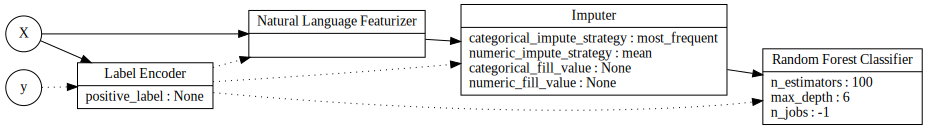

In [11]:
best_pipeline.graph()

Notice above that there is a `Natural Language Featurizer` as the first step in the pipeline. AutoMLSearch uses the woodwork accessor to recognize that `'Message'` is a text column, and converts this text into numerical values that can be handled by the estimator.

## Evaluate on holdout

Now, we can score the pipeline on the holdout data using the core objectives for binary classification problems.

In [12]:
scores = best_pipeline.score(X_holdout, y_holdout,  objectives=evalml.objectives.get_core_objectives('binary'))
print(f'Accuracy Binary: {scores["Accuracy Binary"]}')

Accuracy Binary: 0.9333333333333333


As you can see, this model performs relatively well on this dataset, even on unseen data.

## What does the Natural Language Featurizer do?

Machine learning models cannot handle non-numeric data. Any text must be broken down into numeric features that provide useful information about that text. The Natural Natural Language Featurizer first normalizes your text by removing any punctuation and other non-alphanumeric characters and converting any capital letters to lowercase. From there, it passes the text into [featuretools](https://www.featuretools.com/)' [nlp_primitives](https://docs.featuretools.com/en/v0.16.0/api_reference.html#natural-language-processing-primitives) `dfs` search, resulting in several informative features that replace the original column in your dataset: Diversity Score, Mean Characters per Word, Polarity Score, LSA (Latent Semantic Analysis), Number of Characters, and Number of Words.

**Diversity Score** is the ratio of unique words to total words.

**Mean Characters per Word** is the average number of letters in each word.

**Polarity Score** is a prediction of how "polarized" the text is, on a scale from -1 (extremely negative) to 1 (extremely positive).

**Latent Semantic Analysis** is an abstract representation of how important each word is with respect to the entire text, reduced down into two values per text. While the other text features are each a single column, this feature adds two columns to your data, `LSA(column_name)[0]` and `LSA(column_name)[1]`.

**Number of Characters** is the number of characters in the text.

**Number of Words** is the number of words in the text.

Let's see what this looks like with our spam/ham example.

In [13]:
best_pipeline.input_feature_names

{'Label Encoder': ['Message'],
 'Natural Language Featurizer': ['Message'],
 'Imputer': ['DIVERSITY_SCORE(Message)',
  'MEAN_CHARACTERS_PER_WORD(Message)',
  'NUM_CHARACTERS(Message)',
  'NUM_WORDS(Message)',
  'POLARITY_SCORE(Message)',
  'LSA(Message)[0]',
  'LSA(Message)[1]'],
 'Random Forest Classifier': ['DIVERSITY_SCORE(Message)',
  'MEAN_CHARACTERS_PER_WORD(Message)',
  'NUM_CHARACTERS(Message)',
  'NUM_WORDS(Message)',
  'POLARITY_SCORE(Message)',
  'LSA(Message)[0]',
  'LSA(Message)[1]']}

Here, the Natural Language Featurizer takes in a single "Message" column, but then the next component in the pipeline, the Imputer, receives five columns of input. These five columns are the result of featurizing the text-type "Message" column. Most importantly, these featurized columns are what ends up passed in to the estimator.

If the dataset had any non-text columns, those would be left alone by this process. If the dataset had more than one text column, each would be broken into these five feature columns independently. 

### The features, more directly

Rather than just checking the new column names, let's examine the output of this component directly. We can see this by running the component on its own.

In [14]:
natural_language_featurizer = evalml.pipelines.components.NaturalLanguageFeaturizer()
X_featurized = natural_language_featurizer.fit_transform(X_train)

Now we can compare the input data to the output from the Natural Language Featurizer:

In [15]:
X_train.head()

,Message
296,Sunshine Hols. To claim ur med holiday send a ...
652,Yup ü not comin :-(
526,Hello hun how ru? Its here by the way. Im good...
571,I tagged MY friends that you seemed to count a...
472,What happened to our yo date?


In [16]:
X_featurized.head()

,DIVERSITY_SCORE(Message),MEAN_CHARACTERS_PER_WORD(Message),NUM_CHARACTERS(Message),NUM_WORDS(Message),POLARITY_SCORE(Message),LSA(Message)[0],LSA(Message)[1]
296,1.0,4.344828,154.0,29.0,0.003,0.150556,-0.072443
652,1.0,3.000000,16.0,5.0,0.000,0.017340,-0.005411
526,1.0,3.363636,143.0,33.0,0.162,0.169954,0.022670
571,0.8,4.083333,60.0,12.0,0.681,0.144713,0.036799
472,1.0,3.833333,28.0,6.0,0.000,0.109373,-0.042754


These numeric values now represent important information about the original text that the estimator at the end of the pipeline can successfully use to make predictions.

## Why encode text this way?

To demonstrate the importance of text-specific modeling, let's train a model with the same dataset, without letting `AutoMLSearch` detect the text column. We can change this by explicitly setting the data type of the `'Message'` column in Woodwork to `Categorical` using the utility method `infer_feature_types`.

In [17]:
from evalml.utils import infer_feature_types
X = infer_feature_types(X, {'Message': 'Categorical'})
X_train, X_holdout, y_train, y_holdout = evalml.preprocessing.split_data(X, y, problem_type='binary', test_size=0.2, random_seed=0)

In [18]:
automl_no_text = AutoMLSearch(X_train=X_train, y_train=y_train,
                              problem_type='binary',
                              max_batches=1,
                              optimize_thresholds=True,
                              verbose=True)

automl_no_text.search()

Generating pipelines to search over...


INFO:evalml.automl.automl_algorithm.iterative_algorithm.verbose:Generating pipelines to search over...
DEBUG:evalml.automl.automl_algorithm.iterative_algorithm.verbose:allowed_estimators set to ['Decision Tree Classifier', 'LightGBM Classifier', 'Extra Trees Classifier', 'Elastic Net Classifier', 'CatBoost Classifier', 'XGBoost Classifier', 'Random Forest Classifier', 'Logistic Regression Classifier']
DEBUG:evalml.automl.automl_algorithm.iterative_algorithm.verbose:allowed_pipelines set to ['Elastic Net Classifier w/ Label Encoder + Natural Language Featurizer + Imputer + Standard Scaler', 'Logistic Regression Classifier w/ Label Encoder + Natural Language Featurizer + Imputer + Standard Scaler', 'XGBoost Classifier w/ Label Encoder + Natural Language Featurizer + Imputer', 'LightGBM Classifier w/ Label Encoder + Natural Language Featurizer + Imputer', 'CatBoost Classifier w/ Label Encoder + Natural Language Featurizer + Imputer', 'Random Forest Classifier w/ Label Encoder + Natural La

8 pipelines ready for search.


INFO:evalml.automl.automl_algorithm.iterative_algorithm.verbose:8 pipelines ready for search.



*****************************


INFO:evalml.automl.automl_search.verbose:
*****************************


* Beginning pipeline search *


INFO:evalml.automl.automl_search.verbose:* Beginning pipeline search *


*****************************


INFO:evalml.automl.automl_search.verbose:*****************************


INFO:evalml.automl.automl_search.verbose:


Optimizing for Log Loss Binary. 


INFO:evalml.automl.automl_search.verbose:Optimizing for Log Loss Binary. 


Lower score is better.



INFO:evalml.automl.automl_search.verbose:Lower score is better.



Using SequentialEngine to train and score pipelines.


INFO:evalml.automl.automl_search.verbose:Using SequentialEngine to train and score pipelines.


Searching up to 1 batches for a total of 9 pipelines. 


INFO:evalml.automl.automl_search.verbose:Searching up to 1 batches for a total of 9 pipelines. 


Allowed model families: linear_model, linear_model, xgboost, lightgbm, catboost, random_forest, decision_tree, extra_trees



INFO:evalml.automl.automl_search.verbose:Allowed model families: linear_model, linear_model, xgboost, lightgbm, catboost, random_forest, decision_tree, extra_trees



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type'…

Evaluating Baseline Pipeline: Mode Baseline Binary Classification Pipeline


INFO:evalml.automl.automl_search.verbose:Evaluating Baseline Pipeline: Mode Baseline Binary Classification Pipeline


Mode Baseline Binary Classification Pipeline:


INFO:evalml.automl.automl_search.verbose:Mode Baseline Binary Classification Pipeline:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Optimal threshold found (0.135)
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Log Loss Binary score: 13.988
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Optimal threshold found (0.135)
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Log Loss Binary score: 13.988
DEBUG:

	Finished cross validation - mean Log Loss Binary: 14.046


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean Log Loss Binary: 14.046



*****************************


INFO:evalml.automl.automl_search.verbose:
*****************************


* Evaluating Batch Number 1 *


INFO:evalml.automl.automl_search.verbose:* Evaluating Batch Number 1 *


*****************************


INFO:evalml.automl.automl_search.verbose:*****************************


INFO:evalml.automl.automl_search.verbose:


Elastic Net Classifier w/ Label Encoder + Natural Language Featurizer + Imputer + Standard Scaler:


INFO:evalml.automl.automl_search.verbose:Elastic Net Classifier w/ Label Encoder + Natural Language Featurizer + Imputer + Standard Scaler:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Optimal threshold found (0.253)
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Log Loss Binary score: 0.310
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Optimal threshold found (0.196)
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Log Loss Binary score: 0.248
DEBUG:ev

	Finished cross validation - mean Log Loss Binary: 0.329


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean Log Loss Binary: 0.329


Logistic Regression Classifier w/ Label Encoder + Natural Language Featurizer + Imputer + Standard Scaler:


INFO:evalml.automl.automl_search.verbose:Logistic Regression Classifier w/ Label Encoder + Natural Language Featurizer + Imputer + Standard Scaler:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Optimal threshold found (0.267)
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Log Loss Binary score: 0.302
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Optimal threshold found (0.638)
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Log Loss Binary score: 0.241
DEBUG:ev

	Finished cross validation - mean Log Loss Binary: 0.324


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean Log Loss Binary: 0.324


XGBoost Classifier w/ Label Encoder + Natural Language Featurizer + Imputer:


INFO:evalml.automl.automl_search.verbose:XGBoost Classifier w/ Label Encoder + Natural Language Featurizer + Imputer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Optimal threshold found (0.295)
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Log Loss Binary score: 0.222
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Optimal threshold found (0.769)
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Log Loss Binary score: 0.159
DEBUG:ev

	Finished cross validation - mean Log Loss Binary: 0.252


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean Log Loss Binary: 0.252


LightGBM Classifier w/ Label Encoder + Natural Language Featurizer + Imputer:


INFO:evalml.automl.automl_search.verbose:LightGBM Classifier w/ Label Encoder + Natural Language Featurizer + Imputer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Optimal threshold found (0.368)
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Log Loss Binary score: 0.258
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Optimal threshold found (0.897)
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Log Loss Binary score: 0.168
DEBUG:ev

	Finished cross validation - mean Log Loss Binary: 0.269


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean Log Loss Binary: 0.269


CatBoost Classifier w/ Label Encoder + Natural Language Featurizer + Imputer:


INFO:evalml.automl.automl_search.verbose:CatBoost Classifier w/ Label Encoder + Natural Language Featurizer + Imputer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Optimal threshold found (0.489)
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Log Loss Binary score: 0.586
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Optimal threshold found (0.484)
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Log Loss Binary score: 0.580
DEBUG:ev

	Finished cross validation - mean Log Loss Binary: 0.585


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean Log Loss Binary: 0.585


Random Forest Classifier w/ Label Encoder + Natural Language Featurizer + Imputer:


INFO:evalml.automl.automl_search.verbose:Random Forest Classifier w/ Label Encoder + Natural Language Featurizer + Imputer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Optimal threshold found (0.398)
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Log Loss Binary score: 0.206
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Optimal threshold found (0.595)
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Log Loss Binary score: 0.171
DEBUG:ev

	Finished cross validation - mean Log Loss Binary: 0.209


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean Log Loss Binary: 0.209


Decision Tree Classifier w/ Label Encoder + Natural Language Featurizer + Imputer:


INFO:evalml.automl.automl_search.verbose:Decision Tree Classifier w/ Label Encoder + Natural Language Featurizer + Imputer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Optimal threshold found (0.183)
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Log Loss Binary score: 1.384
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Optimal threshold found (0.626)
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Log Loss Binary score: 1.000
DEBUG:ev

	Finished cross validation - mean Log Loss Binary: 1.698


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean Log Loss Binary: 1.698


	High coefficient of variation (cv >= 0.5) within cross validation scores.
	Decision Tree Classifier w/ Label Encoder + Natural Language Featurizer + Imputer may not perform as estimated on unseen data.


	Decision Tree Classifier w/ Label Encoder + Natural Language Featurizer + Imputer may not perform as estimated on unseen data.


Extra Trees Classifier w/ Label Encoder + Natural Language Featurizer + Imputer:


INFO:evalml.automl.automl_search.verbose:Extra Trees Classifier w/ Label Encoder + Natural Language Featurizer + Imputer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Optimal threshold found (0.421)
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Log Loss Binary score: 0.285
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Optimal threshold found (0.252)
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Log Loss Binary score: 0.244
DEBUG:ev

	Finished cross validation - mean Log Loss Binary: 0.268


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean Log Loss Binary: 0.268



Search finished after 00:34            


INFO:evalml.automl.automl_search.verbose:
Search finished after 00:34            


Best pipeline: Random Forest Classifier w/ Label Encoder + Natural Language Featurizer + Imputer


INFO:evalml.automl.automl_search.verbose:Best pipeline: Random Forest Classifier w/ Label Encoder + Natural Language Featurizer + Imputer


Best pipeline Log Loss Binary: 0.209360


INFO:evalml.automl.automl_search.verbose:Best pipeline Log Loss Binary: 0.209360


Like before, we can look at the rankings and pick the best pipeline.

In [19]:
automl_no_text.rankings

,id,pipeline_name,search_order,mean_cv_score,standard_deviation_cv_score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,6,Random Forest Classifier w/ Label Encoder + Na...,6,0.209360,0.040523,0.209360,98.509448,False,"{'Label Encoder': {'positive_label': None}, 'I..."
1,3,XGBoost Classifier w/ Label Encoder + Natural ...,3,0.252028,0.111184,0.252028,98.205663,False,"{'Label Encoder': {'positive_label': None}, 'I..."
2,8,Extra Trees Classifier w/ Label Encoder + Natu...,8,0.268202,0.021350,0.268202,98.090516,False,"{'Label Encoder': {'positive_label': None}, 'I..."
3,4,LightGBM Classifier w/ Label Encoder + Natural...,4,0.269452,0.108020,0.269452,98.081612,False,"{'Label Encoder': {'positive_label': None}, 'I..."
4,2,Logistic Regression Classifier w/ Label Encode...,2,0.324151,0.096452,0.324151,97.692183,False,"{'Label Encoder': {'positive_label': None}, 'I..."
5,1,Elastic Net Classifier w/ Label Encoder + Natu...,1,0.329292,0.092042,0.329292,97.655582,False,"{'Label Encoder': {'positive_label': None}, 'I..."
6,5,CatBoost Classifier w/ Label Encoder + Natural...,5,0.584976,0.004147,0.584976,95.835212,False,"{'Label Encoder': {'positive_label': None}, 'I..."
7,7,Decision Tree Classifier w/ Label Encoder + Na...,7,1.697547,0.895859,1.697547,87.914177,True,"{'Label Encoder': {'positive_label': None}, 'I..."
8,0,Mode Baseline Binary Classification Pipeline,0,14.045769,0.099705,14.045769,0.000000,False,"{'Label Encoder': {'positive_label': None}, 'B..."


In [20]:
best_pipeline_no_text = automl_no_text.best_pipeline

Here, changing the data type of the text column removed the `Natural Language Featurizer` from the pipeline.

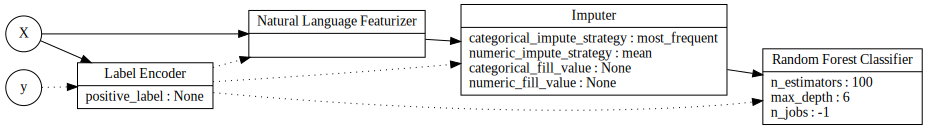

In [21]:
best_pipeline_no_text.graph()

In [22]:
automl_no_text.describe_pipeline(automl_no_text.rankings.iloc[0]["id"])


*************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:
*************************************************************************************


* Random Forest Classifier w/ Label Encoder + Natural Language Featurizer + Imputer *


INFO:evalml.pipelines.pipeline_base.describe:* Random Forest Classifier w/ Label Encoder + Natural Language Featurizer + Imputer *


*************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:*************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:


Problem Type: binary


INFO:evalml.pipelines.pipeline_base.describe:Problem Type: binary


Model Family: Random Forest


INFO:evalml.pipelines.pipeline_base.describe:Model Family: Random Forest


INFO:evalml.pipelines.pipeline_base.describe:


Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:==============


1. Label Encoder


INFO:evalml.pipelines.component_graph.describe:1. Label Encoder


	 * positive_label : None


INFO:evalml.pipelines.components.component_base.describe:	 * positive_label : None


2. Natural Language Featurizer


INFO:evalml.pipelines.component_graph.describe:2. Natural Language Featurizer


3. Imputer


INFO:evalml.pipelines.component_graph.describe:3. Imputer


	 * categorical_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_impute_strategy : most_frequent


	 * numeric_impute_strategy : mean


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_impute_strategy : mean


	 * categorical_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_fill_value : None


	 * numeric_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_fill_value : None


4. Random Forest Classifier


INFO:evalml.pipelines.component_graph.describe:4. Random Forest Classifier


	 * n_estimators : 100


INFO:evalml.pipelines.components.component_base.describe:	 * n_estimators : 100


	 * max_depth : 6


INFO:evalml.pipelines.components.component_base.describe:	 * max_depth : 6


	 * n_jobs : -1


INFO:evalml.pipelines.components.component_base.describe:	 * n_jobs : -1


INFO:evalml.automl.automl_search.describe_pipeline:


Training


INFO:evalml.automl.automl_search.describe_pipeline:Training


INFO:evalml.automl.automl_search.describe_pipeline:========


Training for binary problems.


INFO:evalml.automl.automl_search.describe_pipeline:Training for binary problems.


Total training time (including CV): 3.9 seconds


INFO:evalml.automl.automl_search.describe_pipeline:Total training time (including CV): 3.9 seconds


INFO:evalml.automl.automl_search.describe_pipeline:


Cross Validation


INFO:evalml.automl.automl_search.describe_pipeline:Cross Validation


----------------


INFO:evalml.automl.automl_search.describe_pipeline:----------------


             Log Loss Binary  MCC Binary  Gini   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary # Training # Validation
0                      0.206       0.876 0.953 0.977      0.916 0.927                     0.940            0.940        400          200
1                      0.171       0.855 0.977 0.988      0.947 0.910                     0.921            0.930        400          200
2                      0.252       0.783 0.924 0.962      0.877 0.871                     0.891            0.895        400          200
mean                   0.209       0.838 0.951 0.976      0.913 0.903                     0.917            0.922          -            -
std                    0.041       0.049 0.026 0.013      0.035 0.029                     0.025            0.024          -            -
coef of var            0.194       0.059 0.028 0.014      0.038 0.032                     0.027            0.026          -            -


INFO:evalml.automl.automl_search.describe_pipeline:             Log Loss Binary  MCC Binary  Gini   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary # Training # Validation
0                      0.206       0.876 0.953 0.977      0.916 0.927                     0.940            0.940        400          200
1                      0.171       0.855 0.977 0.988      0.947 0.910                     0.921            0.930        400          200
2                      0.252       0.783 0.924 0.962      0.877 0.871                     0.891            0.895        400          200
mean                   0.209       0.838 0.951 0.976      0.913 0.903                     0.917            0.922          -            -
std                    0.041       0.049 0.026 0.013      0.035 0.029                     0.025            0.024          -            -
coef of var            0.194       0.059 0.028 0.014      0.038 0.032                     0.027            0.026          -    

In [23]:
# get standard performance metrics on holdout data
scores = best_pipeline_no_text.score(X_holdout, y_holdout, objectives=evalml.objectives.get_core_objectives('binary'))
print(f'Accuracy Binary: {scores["Accuracy Binary"]}')

Accuracy Binary: 0.9333333333333333


Without the `Natural Language Featurizer`, the `'Message'` column was treated as a categorical column, and therefore the conversion of this text to numerical features happened in the `One Hot Encoder`. The best pipeline encoded the top 10 most frequent "categories" of these texts, meaning 10 text messages were one-hot encoded and all the others were dropped. Clearly, this removed almost all of the information from the dataset, as we can see the `best_pipeline_no_text` performs very similarly to randomly guessing "ham" in every case.